In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  tensorflow.keras.models import load_model
import pickle



In [6]:
autoencoder_z = load_model('./modelos_entrenamiento/mod_z_R0/modelo1_con_scaler/modelo1.keras')
with open('./modelos_entrenamiento/mod_z_R0/modelo1_con_scaler/scaler_z1.pkl', 'rb') as f:
  scaler_z= pickle.load(f)

In [ ]:
#cargo los subdataset

x_test = pd.read_excel("./Train_Test/Dataset_Separado/x_test_new.xlsx")
y_test = pd.read_excel("./Train_Test/Dataset_Separado/y_test_new.xlsx")


In [13]:
R0 = 6.371E6
out_z_coord = [f'z_{i}' for i in range(1,101)]
y_test_z =  y_test[out_z_coord]/R0

In [ ]:
x_test = x_test.drop(columns =['latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'year'])    


Forma de x_train: (1026, 9)
Columna 0 (latitude_pos_tx): min=-42.2800, max=-42.2800, mean=-42.2800, std=0.0000
Columna 1 (longitude_pos_tx): min=-63.4000, max=-63.4000, mean=-63.4000, std=0.0000
Columna 2 (elevation_pos_tx): min=0.0000, max=0.0000, mean=0.0000, std=0.0000
Columna 3 (fc [Mhz]): min=3.0000, max=30.0000, mean=13.8129, std=6.8735
Columna 4 (elevation): min=0.0000, max=40.0000, mean=13.3187, std=11.4436
Columna 5 (azimuth): min=87.0000, max=98.0000, mean=92.9269, std=4.5666
Columna 6 (year): min=2010.0000, max=2010.0000, mean=2010.0000, std=0.0000
Columna 7 (mmdd): min=102.0000, max=1231.0000, mean=967.5595, std=364.4186
Columna 8 (hour): min=0.0000, max=20.0000, mean=11.0721, std=4.5096


In [23]:
idx = 100

 # Elegir una muestra para comparar (observar luego la muestra 30)
# Predicción de una muestra 
y_pred_scaled = autoencoder_z.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test_z.iloc[idx] # Se obtine Algo de tipo Serie
y_true=y_true.to_numpy() # Transform a Numpy array

#Desnormalizamos
y_pred = scaler_z.inverse_transform(y_pred_scaled)
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


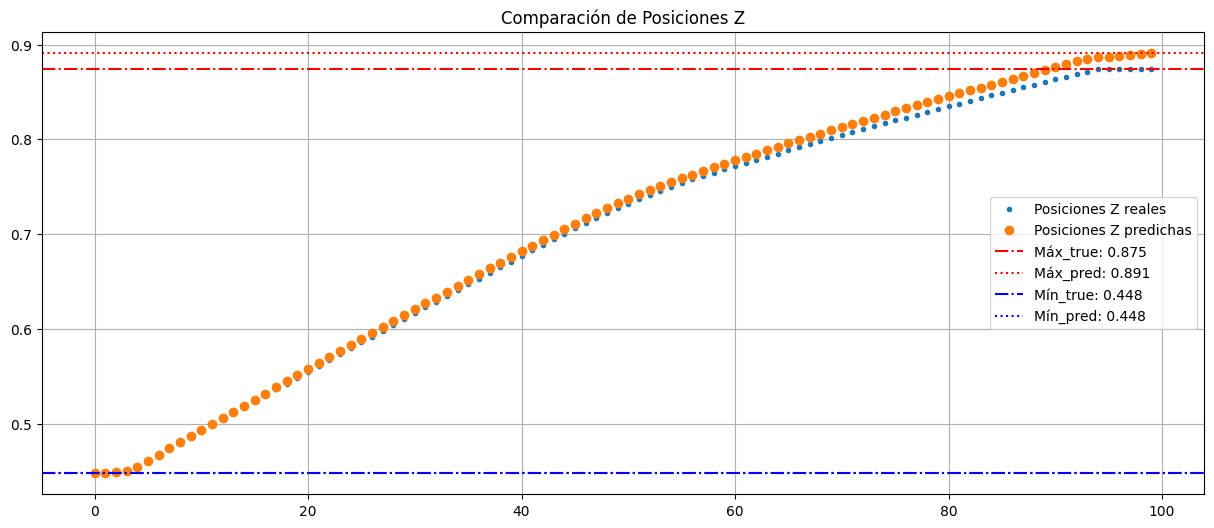

In [24]:
##Graficamos 
# Buscamos los máximos y mínimos 
y_true_max = np.max(y_true)
y_true_min = np.min(y_true)

y_pred_max = np.max(y_pred)
y_pred_min = np.min(y_pred)

# Pos z
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones Z reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones Z predichas', linestyle = 'None',marker='o')
# Dibujamos los max y min
plt.axhline(y = y_true_max, color = 'red', linestyle = '-.', label=f'Máx_true: {y_true_max:.3f}')
plt.axhline(y = y_pred_max, color = 'red', linestyle = ':', label= f'Máx_pred: {y_pred_max:.3f}')
plt.axhline(y = y_true_min, color = 'blue', linestyle ='-.', label=f'Mín_true: {y_true_min:.3f}')
plt.axhline(y = y_pred_min, color = 'blue', linestyle = ':',label= f'Mín_pred:{y_pred_min: .3f}')

# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones Z')
plt.legend()
plt.grid(True)
plt.show()